<a href="https://colab.research.google.com/github/Sonniah509/python/blob/master/transferlearningsoiltype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

soil-types.zip: Skipping, found more recently modified local copy (use --force to force download)
Found 156 images belonging to 5 classes.
{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 109, 109, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                       

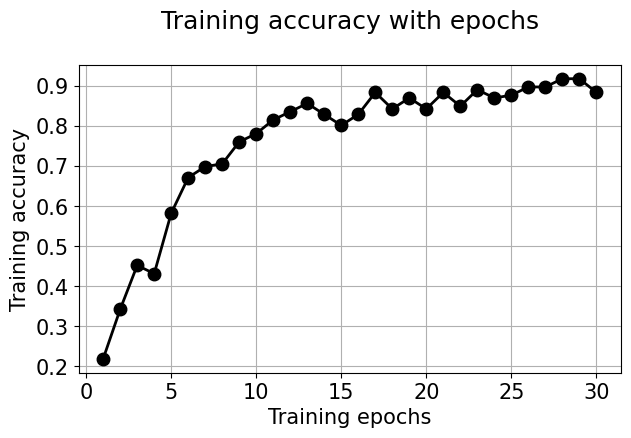

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved artifact at 'export_dir='.''. The following endpoints are available:

* Endpoint 'serve'
  Args:
    args_0: float32 Tensor, shape=(None, 220, 220, 3)
  Returns:
    float32 Tensor, shape=(None, 5)


922768

In [2]:
import os
import os
import numpy as np
import pandas as pd
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d prasanshasatpathy/soil-types
!chmod 600 /content/kaggle.json
dir_black = os.path.join('../content/soil-type/Soil types/Black Soil')
dir_Cinder = os.path.join('../content/soil-type/Soil types/Cinder Soil')
dir_Laterite = os.path.join('../content/soil-type/Soil types/Laterite Soil')
dir_peat = os.path.join('../content/soil-type/Soil types/Peat Soil')
dir_yellow = os.path.join('../content/soil-type/Soil types/Yellow Soil')
import tensorflow as tf
from tensorflow import keras
image_size = 220
batch_size = 10
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '../content/soil-type/Soil types',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape
print (train_generator.class_indices)
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])
total_sample = train_generator.n
n_epochs = 30
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
